In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [232]:
df = pd.read_csv('pca_student_test_scores.csv')
df

,studentID,spelling,vocabulary,multiplication,geometry
0,1,1.8,2.1,5.4,5.6
1,2,2.9,3.1,6.6,5.7
2,3,4.6,5.7,2.8,1.6
3,4,8.0,7.1,3.5,3.4
4,5,8.1,8.0,1.3,2.2
5,6,8.3,5.6,7.0,9.1
6,7,4.4,4.2,9.1,7.3
7,8,7.2,6.3,8.1,7.8
8,9,4.2,5.1,9.9,9.3
9,10,8.7,10.3,8.2,8.7


In [233]:
columns = ['spelling', 'vocabulary', 'multiplication', 'geometry']

spelling VS vocabulary, multiplication  VS geometry
Having High correlation 

spelling VS vocabulary,  converted in C1 (New component created)
multiplication  VS geometry,  converted in C2 (New component created)
C1 and C2 fed to ML model 

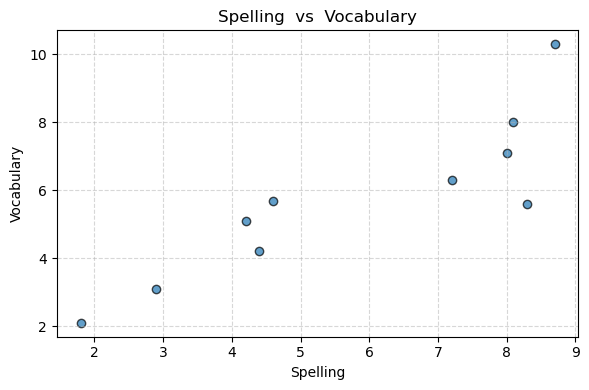

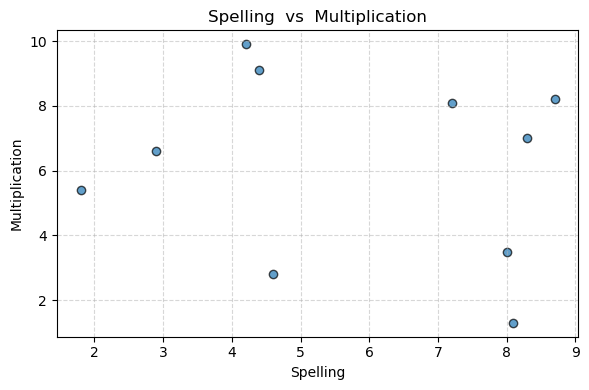

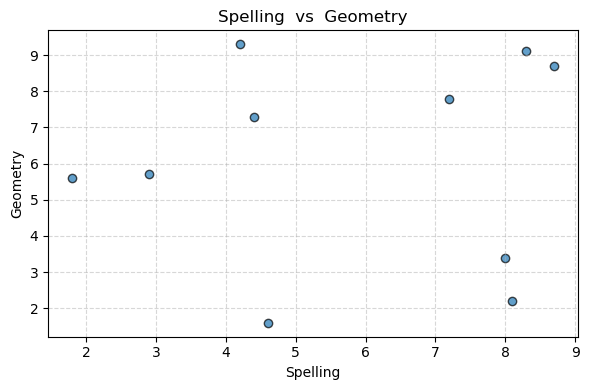

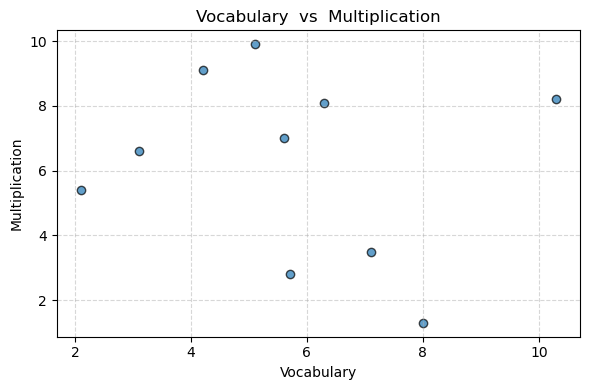

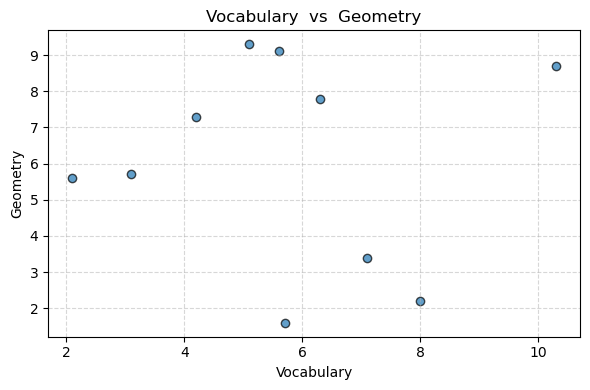

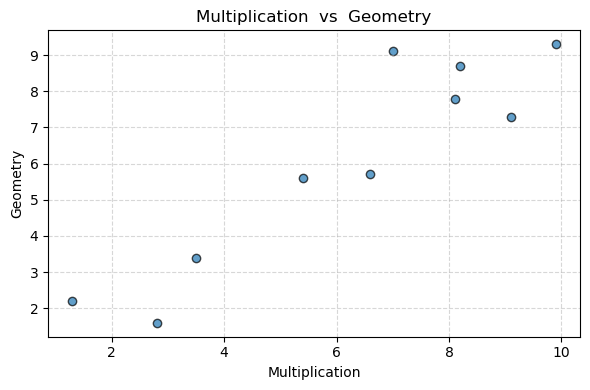

In [235]:
#Generate individual scatterplots for each pair of columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        plt.figure(figsize=(6,4))
        plt.scatter(df[columns[i]], df[columns[j]],alpha=0.7, edgecolor='k')
        plt.xlabel(columns[i].capitalize())
        plt.ylabel(columns[j].capitalize())
        plt.title(f'{columns[i].capitalize()}  vs  {columns[j].capitalize()}')
        plt.grid(True, linestyle = '--', alpha =0.5)
        plt.tight_layout()
      

In [236]:
#PCA Implementation 

In [237]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [238]:
df  = pd.read_csv('titanic1.csv')
df

,survived,pclass,gender,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,NaN
887,1,1,female,19.0,0,0,30.0000,S,B
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,C


In [239]:
df.dtypes


survived      int64
pclass        int64
gender       object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
deck         object
dtype: object

In [240]:
numerical_columns = ['age', 'sibsp', 'parch', 'fare']
categorical_columns = ['pclass', 'gender', 'embarked', 'deck']

In [284]:
#Handle missing values
numerical_data = df[numerical_columns]
imputer_num = SimpleImputer(strategy='mean')

numerical_data = imputer_num.fit_transform(numerical_data)
numerical_df = pd.DataFrame(numerical_data, columns = numerical_columns)
imputer_num

SimpleImputer()

In [242]:
#Handle missing values 
categorical_data = df[categorical_columns]
imput_cat = SimpleImputer(strategy= 'most_frequent')
categorical_data = imput_cat.fit_transform(categorical_data)
categorical_data

array([[3, 'male', 'S', 'C'],
       [1, 'female', 'C', 'C'],
       [3, 'female', 'S', 'C'],
       ...,
       [3, 'female', 'S', 'C'],
       [1, 'male', 'C', 'C'],
       [3, 'male', 'Q', 'C']], dtype=object)

In [243]:
encoder = OneHotEncoder(sparse_output=False , handle_unknown='ignore')
categorical_data = encoder.fit_transform(categorical_data)
categorical_df = pd.DataFrame(categorical_data, columns = encoder.get_feature_names_out(categorical_columns))
categorical_data
categorical_df

,pclass_1,pclass_2,pclass_3,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [244]:
#Combine numerical and categorical data using pd.concat
combined_data = pd.concat([numerical_df, categorical_df] , axis = 1)
combined_data

,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,gender_female,gender_male,embarked_C,embarked_Q,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
0,22.000000,1.0,0.0,7.2500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,38.000000,1.0,0.0,71.2833,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,26.000000,0.0,0.0,7.9250,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,35.000000,1.0,0.0,53.1000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,35.000000,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0.0,0.0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
887,19.000000,0.0,0.0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
888,29.699118,1.0,2.0,23.4500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
889,26.000000,0.0,0.0,30.0000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [245]:
#Standardized the data 
scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)
combined_data_scaled

array([[-0.5924806 ,  0.43279337, -0.47367361, ..., -0.19300938,
        -0.12168146, -0.06715343],
       [ 0.63878901,  0.43279337, -0.47367361, ..., -0.19300938,
        -0.12168146, -0.06715343],
       [-0.2846632 , -0.4745452 , -0.47367361, ..., -0.19300938,
        -0.12168146, -0.06715343],
       ...,
       [ 0.        ,  0.43279337,  2.00893337, ..., -0.19300938,
        -0.12168146, -0.06715343],
       [-0.2846632 , -0.4745452 , -0.47367361, ..., -0.19300938,
        -0.12168146, -0.06715343],
       [ 0.17706291, -0.4745452 , -0.47367361, ..., -0.19300938,
        -0.12168146, -0.06715343]])

In [266]:
#Applt PCA 
pca = PCA(n_components=8) #Reduce to n components
X_pca = pca.fit_transform(combined_data_scaled)


In [268]:
#Convert to dataframe for eady viewing 
pca_df = pd.DataFrame(X_pca, columns = ['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-1.684402,-0.519379,0.004304,0.955430,0.169694,-0.021695,0.080293,0.117759
1,2.550617,1.158736,-1.533603,-0.924598,-1.195608,-0.519086,0.449482,0.041824
2,-0.814943,1.360034,0.248919,-0.590706,0.924239,-0.811769,0.092084,0.690196
3,1.397212,0.903123,0.870074,-0.339045,0.031533,-1.390298,0.093330,0.036067
4,-1.494504,-1.070077,-0.071191,0.373368,0.371151,-0.433479,-0.002343,0.361974
...,...,...,...,...,...,...,...,...
886,-0.923302,-1.138117,1.510156,-1.163507,-1.150193,0.314144,-0.178589,0.171073
887,3.506293,0.595840,0.906424,0.485555,1.037126,-0.396104,-2.222054,2.006661
888,-0.544400,2.450330,0.693471,0.689891,0.378400,-0.623717,0.328915,-0.111070
889,1.321990,-1.144539,-1.945397,-0.227800,-1.491337,0.409327,0.321370,0.207457


In [270]:
#VARIANCE captured by each component 
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
print(explained_variance)

print(cumulative_variance)

[0.1839623  0.12015164 0.10560044 0.08017164 0.07077132 0.06195549
 0.05595943 0.05461312]
[0.1839623  0.30411394 0.40971438 0.48988602 0.56065734 0.62261283
 0.67857226 0.73318538]


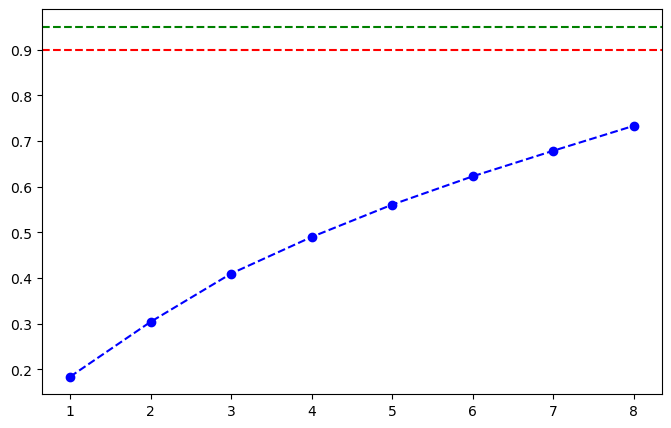

In [278]:

#Plot cumulative variance 
plt.figure(figsize=(8,5))
plt.plot(range(1,len(cumulative_variance) + 1 ) ,  cumulative_variance, marker = 'o', linestyle = '--', color= 'b')
plt.axhline(y=0.9,color='red',linestyle='--',label="90% variance")
plt.axhline(y=0.95,color='green',linestyle='--',label="95% variance")